In [46]:
import numpy as np 
import pandas as pd 

In [47]:
ProductInfo = pd.read_csv("product_info.csv")

In [48]:
ProductInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [49]:
CopyofProductInfo = ProductInfo.copy()

# List of columns to drop
columns_to_drop = [
    'variation_type', 'variation_value', 'variation_desc', 'value_price_usd', 'sale_price_usd', 'new', 'out_of_stock', 'sephora_exclusive',
    'child_max_price', 'child_min_price', 
    'tertiary_category', 'child_count', 
]

#Drop and reassign data frame 
CopyofProductInfo = CopyofProductInfo.drop(columns=columns_to_drop)

CopyofProductInfo.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'ingredients', 'price_usd',
       'limited_edition', 'online_only', 'highlights', 'primary_category',
       'secondary_category'],
      dtype='object')

In [50]:
import numpy as np
import re

# Extract the numeric value before 'oz' and convert it to float 
CopyofProductInfo['size_oz'] = (
    CopyofProductInfo['size']
    .str.extract(r'([0-9]*\.?[0-9]+)\s*oz', expand=False)
    .astype(float)
)

# Display the result for the first 10 rows 
print(CopyofProductInfo[['size', 'size_oz']].head(10))

              size  size_oz
0              NaN      NaN
1   3.4 oz/ 100 mL     3.40
2   3.4 oz/ 100 mL     3.40
3   3.4 oz/ 100 mL     3.40
4   3.4 oz/ 100 mL     3.40
5  0.25 oz/ 7.5 mL     0.25
6  0.25 oz/ 7.5 mL     0.25
7   3.4 oz/ 100 mL     3.40
8   3.4 oz/ 100 mL     3.40
9  0.25 oz/ 7.5 mL     0.25


In [51]:
# Drop the original 'size' column 
CopyofProductInfo = CopyofProductInfo.drop(columns=['size'])

# Check the remaining columns to ensure 'size' is gone
print("\nUpdated Columns:")
print(CopyofProductInfo.columns)


Updated Columns:
Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'ingredients', 'price_usd', 'limited_edition',
       'online_only', 'highlights', 'primary_category', 'secondary_category',
       'size_oz'],
      dtype='object')


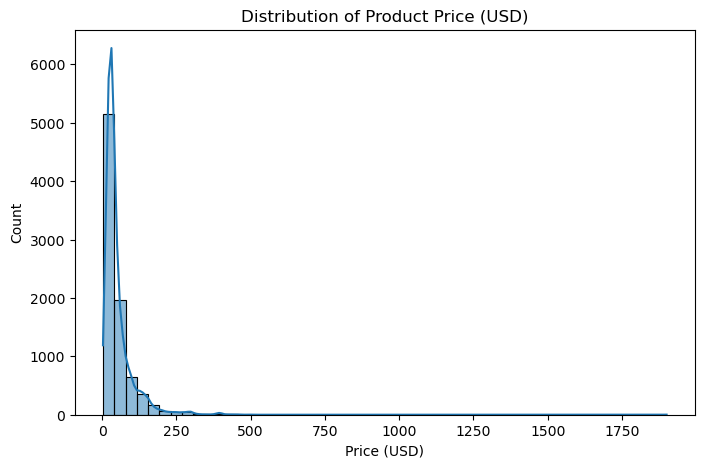

Price Skewness: 7.38


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(CopyofProductInfo['price_usd'], bins=50, kde=True)
plt.title('Distribution of Product Price (USD)')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.show()

# Skewness Check
print(f"Price Skewness: {CopyofProductInfo['price_usd'].skew():.2f}")

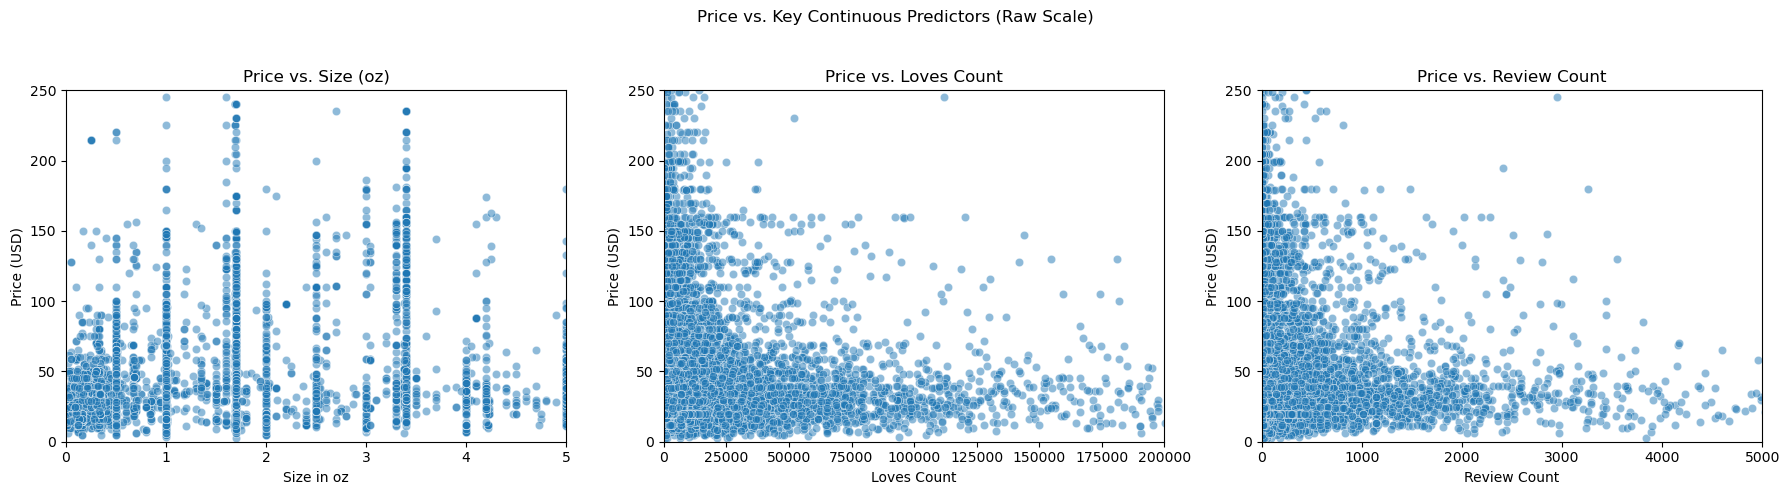

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Price vs. Key Continuous Predictors (Raw Scale)')

# 1. Price vs. Size (oz)
sns.scatterplot(x='size_oz', y='price_usd', data=CopyofProductInfo, ax=axes[0], alpha=0.5)
axes[0].set_title('Price vs. Size (oz)')
axes[0].set_xlabel('Size in oz')
axes[0].set_ylabel('Price (USD)')
axes[0].set_ylim(0, 250) 
axes[0].set_xlim(0, 5) 

# 2. Price vs. Loves Count
sns.scatterplot(x='loves_count', y='price_usd', data=CopyofProductInfo, ax=axes[1], alpha=0.5)
axes[1].set_title('Price vs. Loves Count')
axes[1].set_xlabel('Loves Count')
axes[1].set_ylabel('Price (USD)')
axes[1].set_ylim(0, 250)
axes[1].set_xlim(0, 200000) 

# 3. Price vs. Reviews
sns.scatterplot(x='reviews', y='price_usd', data=CopyofProductInfo, ax=axes[2], alpha=0.5)
axes[2].set_title('Price vs. Review Count')
axes[2].set_xlabel('Review Count')
axes[2].set_ylabel('Price (USD)')
axes[2].set_ylim(0, 250)
axes[2].set_xlim(0, 5000) 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

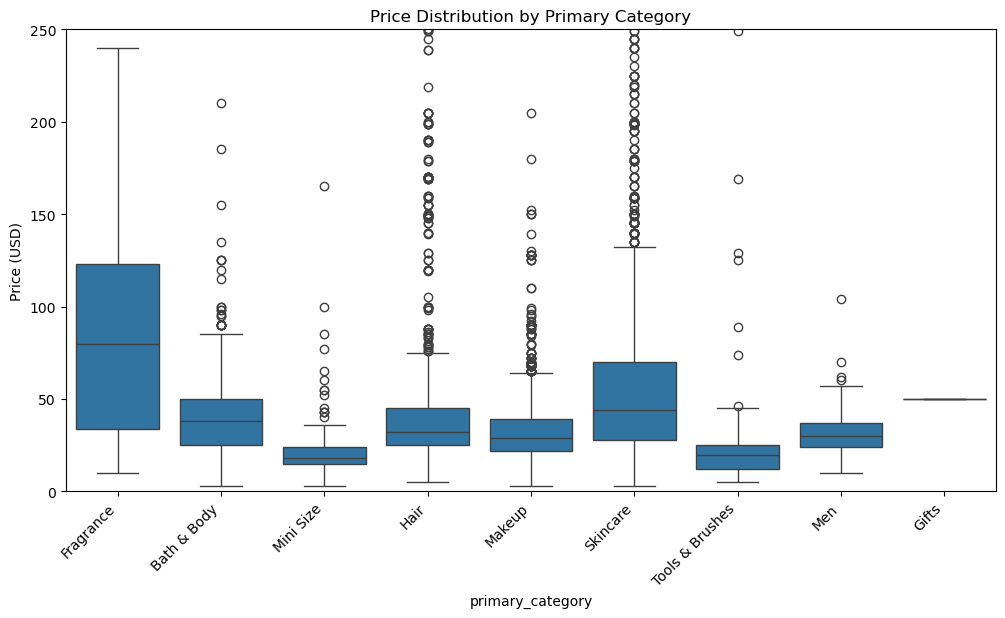

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.boxplot(x='primary_category', y='price_usd', data=CopyofProductInfo)
plt.title('Price Distribution by Primary Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 250) 
plt.show()

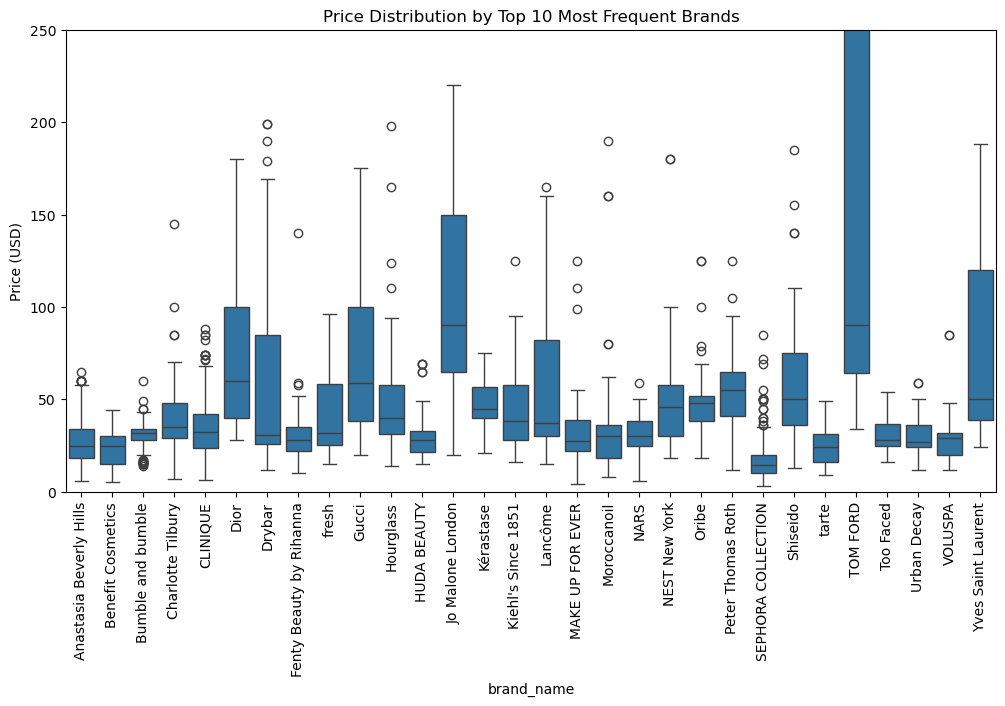

In [26]:
# Find the top 10 most frequent brands
top_10_brands = CopyofProductInfo['brand_name'].value_counts().nlargest(30).index

# Filter the DataFrame to include only these top brands
df_top_brands = CopyofProductInfo[CopyofProductInfo['brand_name'].isin(top_10_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand_name', y='price_usd', data=df_top_brands)
plt.title('Price Distribution by Top 10 Most Frequent Brands')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.ylim(0, 250) # Limit y-axis for better visibility
plt.show()

In [57]:
# 1. Filter out the 'Men' category
CleanerCopy = CopyofProductInfo[CopyofProductInfo['primary_category'] != 'Men'].copy()

CleanerCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8434 entries, 0 to 8493
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8434 non-null   object 
 1   product_name        8434 non-null   object 
 2   brand_id            8434 non-null   int64  
 3   brand_name          8434 non-null   object 
 4   loves_count         8434 non-null   int64  
 5   rating              8157 non-null   float64
 6   reviews             8157 non-null   float64
 7   ingredients         7490 non-null   object 
 8   price_usd           8434 non-null   float64
 9   limited_edition     8434 non-null   int64  
 10  online_only         8434 non-null   int64  
 11  highlights          6274 non-null   object 
 12  primary_category    8434 non-null   object 
 13  secondary_category  8427 non-null   object 
 14  size_oz             6448 non-null   float64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.0+ MB


In [28]:
print(CleanerCopy.isna().sum())

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 277
reviews                277
ingredients            944
price_usd                0
limited_edition          0
online_only              0
highlights            2160
primary_category         0
secondary_category       7
size_oz               1986
dtype: int64


In [58]:
# 1. Count the unique entries in the ingredients column
unique_count = CleanerCopy['ingredients'].nunique()
total_count = len(CleanerCopy)

print(f"Total rows in DataFrame: {total_count}")
print(f"Unique entries in 'ingredients' column: {unique_count}")

Total rows in DataFrame: 8434
Unique entries in 'ingredients' column: 6480


In [61]:
# 2. Display the top 5 most frequent (non-null) ingredient strings
print("\nTop 5 Most Frequent Ingredient Strings:")
print(CleanerCopy['ingredients'].value_counts().nlargest(5))

# 3. Display the length of the longest ingredient list
longest_list_length = CleanerCopy['ingredients'].str.len().max()
print(f"\nMax length of an ingredient string (characters): {longest_list_length}")


Top 5 Most Frequent Ingredient Strings:
ingredients
['Sugarcane Alcohol Denat., Fragrance/Parfum*, Water/Eau/Aqua.']                                                                   15
['All-Natural Coconut and Beeswax Blend. Paraffin-Free. 100% Braided Cotton Wick.']                                                13
['Glass, 100% Natural Coconut Soy Wax (No Paraffin), Fragrance Oil, 100% Cotton Wick. Paraben-, Phthalate-, and Cruelty-Free.']     7
['SD Alcohol 40-B (Alcohol Denat.), Parfum/Fragrance, Aqua/Water/Eau.']                                                             6
['Pure, FDA Approved, Naturally Derived, Food-Grade Paraffin, Renewable Plant Oils, Vegetable Soy Wax, Fragrance.']                 5
Name: count, dtype: int64

Max length of an ingredient string (characters): 16488.0


In [62]:
import re

# We will create a new DataFrame 'IngredientsDF' to work on just the text, 
# ensuring we handle the 944 missing (NaN) values by treating them as empty strings.
IngredientsDF = CleanerCopy[['ingredients', 'price_usd']].copy()
IngredientsDF['ingredients_list'] = IngredientsDF['ingredients'].fillna('').str.lower()

# 1. Clean the text: Remove punctuation, numbers, and multiple ingredient lists 
# This regex aims to keep only word characters, and replaces separators like ':', '[', ']', and '.' with spaces.
def clean_ingredients(text):
    # This is a simplification; a full NLP pipeline would be better, but we are looking for keywords.
    text = re.sub(r'[^a-z\s]+', ' ', text) 
    text = re.sub(r'\s+', ' ', text).strip() 
    return text

IngredientsDF['cleaned_ingredients'] = IngredientsDF['ingredients_list'].apply(clean_ingredients)

# 2.split into words
all_tokens = ' '.join(IngredientsDF['cleaned_ingredients']).split()

# Check the total number of words we've collected
print(f"Total tokens collected: {len(all_tokens)}")

Total tokens collected: 620663


In [64]:
from collections import Counter

# Count the frequency of each token
token_counts = Counter(all_tokens)

# Remove generic words that have no predictive power (called Stop Words)
stop_words = set(['and', 'with', 'the', 'a', 'to', 'for', 'of', 'in', 'is', 'citral', 'linalool', 'parfum', 'alcohol', 'denat', 'fragrance', 'eau', 'aqua', 'water', 'sd', 'salicylate', 'butyl', 'methoxydibenzoylmethane', 'ethylhexyl', 'methoxycinnamate', 'limonene', 'ci']) # Added common chemical/filler words

# Filter out stop words and short, meaningless tokens
filtered_tokens = {token: count for token, count in token_counts.items() 
                  if token not in stop_words and len(token) > 3}

# Get the top 10 most frequent, non-generic ingredient keywords
top_10_keywords = Counter(filtered_tokens).most_common(10)

print("\nTop 10 Most Frequent Ingredient Keywords (excluding generic/filler):")
for keyword, count in top_10_keywords:
    print(f"- {keyword}: {count}")


Top 10 Most Frequent Ingredient Keywords (excluding generic/filler):
- extract: 20690
- sodium: 13187
- acid: 10051
- glycol: 8918
- seed: 7887
- dimethicone: 5365
- leaf: 5278
- fruit: 4809
- glycerin: 4538
- iron: 4491


In [65]:
import re
import numpy as np

# This is the function we used to remove punctuation and standardize the text.
def clean_ingredients(text):
    text = re.sub(r'[^a-z\s]+', ' ', text) 
    text = re.sub(r'\s+', ' ', text).strip() 
    return text

# This ensures the column exists in the DataFrame we're working with.
CleanerCopy['cleaned_ingredients'] = (
    CleanerCopy['ingredients']
    .fillna('')
    .str.lower()
    .apply(clean_ingredients)
)

final_keywords = [
    'extract', 'sodium', 'acid', 'glycol', 'seed', 
    'dimethicone', 'leaf', 'fruit', 'glycerin', 'iron'
]

# Create a binary column for each keyword and check correlation
for keyword in final_keywords:
    # 1. Create the binary feature (1 if the keyword is present, 0 otherwise)
    CleanerCopy[f'ingr_{keyword}'] = CleanerCopy['cleaned_ingredients'].str.contains(keyword, na=False).astype(int)

# 2. Finalize the log transformation on price in case it wasn't kept
CleanerCopy['log_price_usd'] = np.log(CleanerCopy['price_usd'])

print("\nCorrelation of Top 10 Ingredient Features with Log(Price):")
for keyword in final_keywords:
    correlation = CleanerCopy['log_price_usd'].corr(CleanerCopy[f'ingr_{keyword}'])
    print(f"- ingr_{keyword}: {correlation:.4f}")


Correlation of Top 10 Ingredient Features with Log(Price):
- ingr_extract: -0.0059
- ingr_sodium: -0.0685
- ingr_acid: -0.0807
- ingr_glycol: -0.0363
- ingr_seed: -0.0499
- ingr_dimethicone: 0.0006
- ingr_leaf: 0.0034
- ingr_fruit: -0.0297
- ingr_glycerin: -0.0479
- ingr_iron: -0.1399


In [66]:
print(CleanerCopy.isna().sum())

product_id                0
product_name              0
brand_id                  0
brand_name                0
loves_count               0
rating                  277
reviews                 277
ingredients             944
price_usd                 0
limited_edition           0
online_only               0
highlights             2160
primary_category          0
secondary_category        7
size_oz                1986
cleaned_ingredients       0
ingr_extract              0
ingr_sodium               0
ingr_acid                 0
ingr_glycol               0
ingr_seed                 0
ingr_dimethicone          0
ingr_leaf                 0
ingr_fruit                0
ingr_glycerin             0
ingr_iron                 0
log_price_usd             0
dtype: int64


In [67]:
# remove rows missing data in the 3 key predictors.
CleanerCopy = CleanerCopy.dropna(subset=['rating', 'reviews', 'size_oz'])

columns_to_drop_now = [
    'product_id', 'product_name', 'brand_id', 'ingredients', 'highlights', 'secondary_category',
    'cleaned_ingredients', 
    'ingr_extract', 'ingr_sodium', 'ingr_acid', 'ingr_glycol', 'ingr_seed', 
    'ingr_dimethicone', 'ingr_leaf', 'ingr_fruit', 'ingr_glycerin', 'ingr_iron'
]
# Drop all non-modeling columns (keeping primary_category and brand_name for encoding)
CleanerCopy = CleanerCopy.drop(columns=columns_to_drop_now, errors='ignore')

print(CleanerCopy.isna().sum())

# Group all brands not in the top 30 into 'Other Brand'
top_30_brands = CleanerCopy['brand_name'].value_counts().nlargest(30).index
CleanerCopy['brand_simplified'] = np.where(
    CleanerCopy['brand_name'].isin(top_30_brands),
    CleanerCopy['brand_name'],
    'Other Brand'
)
# Drop the original brand_name column
CleanerCopy = CleanerCopy.drop(columns=['brand_name'])

# Apply log to the target and highly skewed continuous predictors.
CleanerCopy['log_price_usd'] = np.log(CleanerCopy['price_usd'])
CleanerCopy['log_loves_count'] = np.log(CleanerCopy['loves_count'] + 1)
CleanerCopy['log_reviews'] = np.log(CleanerCopy['reviews'] + 1)
CleanerCopy['log_size_oz'] = np.log(CleanerCopy['size_oz'])

# Drop untransformed columns 
CleanerCopy = CleanerCopy.drop(columns=['price_usd', 'loves_count', 'reviews', 'size_oz'])

# This converts categories into binary columns (dummies).
CleanerCopy = pd.get_dummies(
    CleanerCopy, 
    columns=['primary_category', 'brand_simplified'], 
    drop_first=True 
)

print("\nFinal Modeling DataFrame Info:")
print(CleanerCopy.info())
print(f"\nFinal row count: {len(CleanerCopy)}")

brand_name          0
loves_count         0
rating              0
reviews             0
price_usd           0
limited_edition     0
online_only         0
primary_category    0
size_oz             0
log_price_usd       0
dtype: int64

Final Modeling DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 6289 entries, 1 to 8490
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   rating                                    6289 non-null   float64
 1   limited_edition                           6289 non-null   int64  
 2   online_only                               6289 non-null   int64  
 3   log_price_usd                             6289 non-null   float64
 4   log_loves_count                           6289 non-null   float64
 5   log_reviews                               6289 non-null   float64
 6   log_size_oz                               6289 non-null   fl

In [68]:
# Save the model-ready DataFrame to a CSV file
CleanerCopy.to_csv("Final_Price_Model_Data.csv", index=False)

In [69]:
from sklearn.model_selection import train_test_split
import numpy as np

# Y is the target variable (log-transformed price)
# Drop the target column to create the feature matrix X
Y = CleanerCopy['log_price_usd']
X = CleanerCopy.drop(columns=['log_price_usd'])

# Split the data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42
)

print(f"Total features created: {X.shape[1]}")
print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Total features created: 41
Training set size: 5031 samples
Testing set size: 1258 samples


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Fit the model using the 80% training data
lm = LinearRegression()
lm.fit(X_train, Y_train)

# 2. Predict and evaluate
lm_predictions = lm.predict(X_test)

lm_r2 = r2_score(Y_test, lm_predictions)
lm_rmse = np.sqrt(mean_squared_error(Y_test, lm_predictions))

print("--- Linear Regression Results ---")
print(f"R-squared (R2): {lm_r2:.4f}")
print(f"RMSE (Log-Scale): {lm_rmse:.4f}")

--- Linear Regression Results ---
R-squared (R2): 0.4657
RMSE (Log-Scale): 0.5014


In [71]:
from sklearn.ensemble import RandomForestRegressor

# 1. Fit the model using the 80% training data
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, Y_train)

# 2. Predict and evaluate
rf_predictions = rf.predict(X_test)

rf_r2 = r2_score(Y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_predictions))

print("\n--- Random Forest Regressor Results ---")
print(f"R-squared (R2): {rf_r2:.4f}")
print(f"RMSE (Log-Scale): {rf_rmse:.4f}")


--- Random Forest Regressor Results ---
R-squared (R2): 0.5745
RMSE (Log-Scale): 0.4475


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# 1. Calculate the mean of the ORIGINAL price_usd from your clean data
# We use np.exp() on log_price_usd to get the original price back for the calculation.
mean_price = np.exp(CleanerCopy['log_price_usd']).mean()

# 2. Create the binary target column: 'is_high_price' (1 if price > mean, 0 otherwise)
CleanerCopy['is_high_price'] = (
    np.exp(CleanerCopy['log_price_usd']) > mean_price
).astype(int)

print(f"Mean Price (USD) of the clean dataset: ${mean_price:.2f}")

# Check the class balance to see how many products are considered "high price"
print("\nHigh Price Class Balance:")
print(CleanerCopy['is_high_price'].value_counts(normalize=True))

Mean Price (USD) of the clean dataset: $50.85

High Price Class Balance:
is_high_price
0    0.707744
1    0.292256
Name: proportion, dtype: float64


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import numpy as np

# 1. Calculate the Median of the ORIGINAL price_usd from your clean data
# We use np.exp() on log_price_usd to get the original price back.
median_price = np.exp(CleanerCopy['log_price_usd']).median()

# 2. Create the new binary target column: 'is_high_price_median'
# 1 if price > median, 0 otherwise.
CleanerCopy['is_high_price_median'] = (
    np.exp(CleanerCopy['log_price_usd']) > median_price
).astype(int)

print(f"Median Price (USD) used for classification: ${median_price:.2f}")

# Check the new class balance (should be 50/50)
print("\nBalanced Class Balance Check:")
print(CleanerCopy['is_high_price_median'].value_counts(normalize=True))

Median Price (USD) used for classification: $35.00

Balanced Class Balance Check:
is_high_price_median
0    0.50644
1    0.49356
Name: proportion, dtype: float64


In [74]:
# 1. Define the new target (Y_median)
Y_median = CleanerCopy['is_high_price_median']
# X_class is the features set, dropping both target columns
X_median = CleanerCopy.drop(columns=['log_price_usd', 'is_high_price', 'is_high_price_median']) 

# 2. Re-split the data (80/20 split, same random state=42)
X_train_median, X_test_median, Y_train_median, Y_test_median = train_test_split(
    X_median, Y_median, test_size=0.20, random_state=42
)

# 3. Fit the Logistic Regression model
log_model_median = LogisticRegression(solver='liblinear', max_iter=500, random_state=42)
log_model_median.fit(X_train_median, Y_train_median)

# 4. Predict and Evaluate
test_pred_median = log_model_median.predict(X_test_median)
test_prob_median = log_model_median.predict_proba(X_test_median)[:, 1] 

accuracy_median = accuracy_score(Y_test_median, test_pred_median)
roc_auc_median = roc_auc_score(Y_test_median, test_prob_median)
conf_matrix_median = confusion_matrix(Y_test_median, test_pred_median)

print("\n--- Logistic Regression (Median Price Prediction) Results ---")
print(f"Accuracy: {accuracy_median:.4f}")
print(f"ROC-AUC Score: {roc_auc_median:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_median)


--- Logistic Regression (Median Price Prediction) Results ---
Accuracy: 0.7591
ROC-AUC Score: 0.8454

Confusion Matrix:
[[474 149]
 [154 481]]


In [75]:
import pandas as pd

# The Logistic Regression model using the median threshold is log_model_median.

# Create a DataFrame to hold the coefficients
coefficients = log_model_median.coef_[0]
feature_names = X_median.columns

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute value for sorting influence
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Sort by absolute coefficient value to see the most influential features
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

print("--- Logistic Regression Coefficients (Sorted by Influence) ---")
print(coeff_df_sorted)

--- Logistic Regression Coefficients (Sorted by Influence) ---
                                     Feature  Coefficient
37                  brand_simplified_VOLUSPA    -3.937346
31       brand_simplified_SEPHORA COLLECTION    -3.418390
33                 brand_simplified_TOM FORD     2.944265
21                brand_simplified_Kérastase     2.938521
34           brand_simplified_The INKEY List    -2.902163
35             brand_simplified_The Ordinary    -2.871236
29                    brand_simplified_Oribe     2.364337
19         brand_simplified_Jo Malone London     2.314829
15                     brand_simplified_Dior     1.910336
9                 primary_category_Mini Size    -1.795762
18                brand_simplified_Hourglass     1.707718
32                 brand_simplified_Shiseido     1.620803
6                 primary_category_Fragrance     1.594370
38       brand_simplified_Yves Saint Laurent     1.491201
10                 primary_category_Skincare     1.307303
7        

In [76]:
import pandas as pd

# The fitted Random Forest model is rf.

# 1. Extract feature importances
importances = rf.feature_importances_

# 2. Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# 3. Sort and display the top 10 most important features
feature_importance_df_sorted = feature_importance_df.sort_values(
    by='Importance', 
    ascending=False
)

print("--- Random Forest Feature Importances (Top 10) ---")
print(feature_importance_df_sorted.head(10))

--- Random Forest Feature Importances (Top 10) ---
                                Feature  Importance
5                           log_size_oz    0.238811
6            primary_category_Fragrance    0.179242
3                       log_loves_count    0.105530
4                           log_reviews    0.095019
0                                rating    0.090522
10            primary_category_Skincare    0.061692
31  brand_simplified_SEPHORA COLLECTION    0.048615
35        brand_simplified_The Ordinary    0.030798
34      brand_simplified_The INKEY List    0.023961
9            primary_category_Mini Size    0.018788


In [77]:
import pandas as pd

# The Linear Regression model is lm.

# 1. Create a DataFrame to hold the coefficients
coefficients = lm.coef_
feature_names = X_train.columns

coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 2. Calculate the absolute value for sorting influence
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# 3. Sort by absolute coefficient value to see the most influential features
coeff_df_sorted = coeff_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns=['Abs_Coefficient'])

print("--- Linear Regression Coefficients (Sorted by Influence) ---")
print(coeff_df_sorted)

--- Linear Regression Coefficients (Sorted by Influence) ---
                                     Feature  Coefficient
35             brand_simplified_The Ordinary    -1.211418
34           brand_simplified_The INKEY List    -1.039692
37                  brand_simplified_VOLUSPA    -1.037568
33                 brand_simplified_TOM FORD     0.968072
31       brand_simplified_SEPHORA COLLECTION    -0.864565
6                 primary_category_Fragrance     0.811200
19         brand_simplified_Jo Malone London     0.615371
21                brand_simplified_Kérastase     0.580659
29                    brand_simplified_Oribe     0.539307
15                     brand_simplified_Dior     0.533954
32                 brand_simplified_Shiseido     0.465789
18                brand_simplified_Hourglass     0.437828
38       brand_simplified_Yves Saint Laurent     0.417019
22                  brand_simplified_Lancôme     0.407375
10                 primary_category_Skincare     0.382756
9          